In [ ]:
"""
@author: Panova Maria 428
Variant 21

№1 Методами дихотомии и хорд найти один из корней уравнения 3*x**4 + 8*x**3 + 6*x**2 - 10 = 0 (отделение корня аналитически)
№2 Методами простой итерации и Ньютона найти один из корней уравнения 7**x - 6*x = 2 (начертить график для отделения корней)
№3 Методом Ньютона найти один из корней системы уравнений: 
                                                           x**3 + y**3 = 8
                                                           y = 3 − x**(3/2)
"""


In [10]:
import numpy as np
import math as m
import matplotlib.pyplot as plt

In [11]:
def f(x):
    return 3*x*x*x*x+8*x*x*x+6*x*x-10

In [12]:
# Метод дихотомии

print ("Аналитически найдено, что x1~0.75, x2~-2.04")
print ("Выбираю корень x1~0.75")
a = 0.5
b = 1
E = 0.0001
N1 = 0
while (abs(b-a) >= E):
    c = (a+b)/2
    if (f(a)*f(c) < 0):
        b = c
    if (f(b)*f(c) < 0):
        a = c
    N1 += 1
print ("x ~ ", (a+b)/2)
print ("Количество шагов", N1 )
    

Аналитически найдено, что x1~0.75, x2~-2.04
Выбираю корень x1~0.75
x ~  0.826019287109375
Количество шагов 13


In [13]:
# Метод хорд

E = 0.0001
a = 0
b = 1
N2 = 0
while (abs(b-a) >= E):
    A = (f(a)-f(b))/(a-b)
    B = f(a)-A*a
    c = -B/A
    if (f(a)*f(c) < 0):
        b = c
    if (f(b)*f(c) < 0):
        a = c
    N2 += 1
print ("x ~ ", a)
print ("Количество шагов ", N2 )


x ~  0.8260412264376165
Количество шагов  23


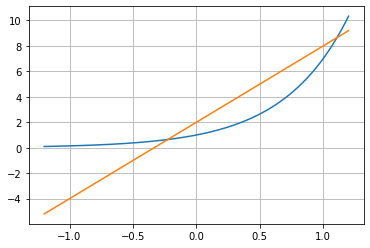

Приблизительные корни -0,24 и 1,2. Возьмем x ~ -0.24


In [14]:
# Графическое отделение корней

def f1(x):
    return 7**x
def f2(x):
    return 6*x+2

E = 0.0001
h = 0.001
N3 = 0

g_y1 = [] 
g_y2 = []
g_x = []
x = -1.2

while (x <= 1.2):
    g_x.append(x)
    g_y1.append(f1(x))
    g_y2.append(f2(x))
    x+=h
    
plt.figure() 
plt.plot (g_x, g_y1)
plt.plot (g_x, g_y2)
plt.grid(True)
plt.show()
    
print("Приблизительные корни -0,24 и 1,2. Возьмем x ~ -0.24")



In [15]:
# Метод простой итерации

X = -0.5
pf = m.log(7) * 7**X - 6  # производная

def Fun(x):
    return 7**x - 6*x - 2

while (abs(Fun(X) >= E)):
    x1 = X - (Fun(X)/pf)
    X = x1
    N3+=1
print ("x ~ ", X)
print ("Количество шагов ", N3)

x ~  -0.22597323486592272
Количество шагов  4


In [16]:
# Метод Ньютона

E = 0.0001
X = -0.5
N4 = 0

def Fun(x):
    return 7**x - 6*x - 2
def pFun(x):
    return m.log(7) * 7**x - 6

while (abs(Fun(X) >= E)):
    x1 = X - (Fun(X)/pFun(X))
    X = x1
    N4+=1
print ("x ~ ", X)
print ("Количество шагов ", N4)

x ~  -0.22596188782774126
Количество шагов  3


In [17]:
# Метод Ньютона для системы уравнений

from numpy import linalg as la

def F1(x,y):
    return x**3 + y**3 - 8
def F2(x,y):
    return x**(3/2) + y - 3

E = 0.0001
x = 1.0
y = 1.88
N5 = 0
x1 = 0

print ("Система имеет несколько решений. Одно из них x ~ 1.065 и y ~ 1.88")

while (abs(x - x1) >= E):
    x1 = x
    a11 = 3*x**2 
    a12 = 3*y**2
    a21 = 1.5*m.sqrt(x)
    a22 = 1
    W = np.array([[a11,a12],[a21,a22]]) # матрица Якоби
    W_inv = la.inv(W) # обратная матрица
    fun1 = F1(x,y)
    fun2 = F2(x,y)
    FUN = np.array([[fun1],[fun2]]) # матрица функций
    X_i = np.array([[x],[y]]) # матрица переменных X_i
    P = W_inv.dot(FUN) # умножение двух матриц (нашла в интернете)
    X_i1 = X_i - P # матрица переменных X_i+1
    x = X_i1[0][0] 
    y = X_i1[1][0]
    N5+=1

print ("x ~ ", x)
print ("y ~ ", y)
print ("Количество шагов ", N5)

Система имеет несколько решений. Одно из них x ~ 1.065 и y ~ 1.88
x ~  1.0707919026530617
y ~  1.8919544406654887
Количество шагов  3
